<a href="https://colab.research.google.com/github/guillevallejo/mc-2023-guillermo-vallejo/blob/main/Taller18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

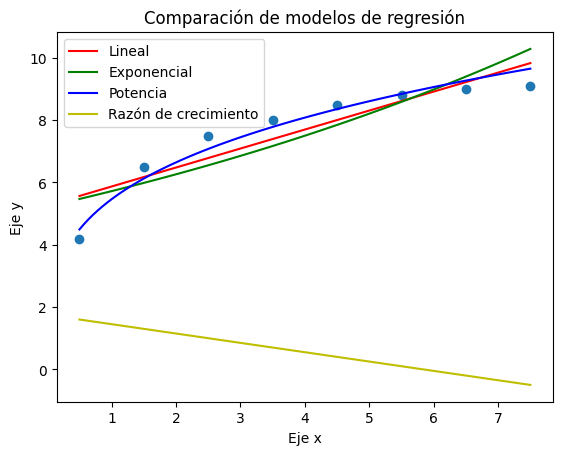

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, b = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, b

def exponential_regression(x, y):
    log_y = np.log(y)
    m, b = linear_regression(x, log_y)
    b = np.exp(b)
    return m, b

def power_regression(x, y):
    log_x = np.log(x)
    log_y = np.log(y)
    m, b = linear_regression(log_x, log_y)
    return m, np.exp(b)

def growth_ratio_regression(x, y):
    ratio = np.diff(y) / np.diff(x)
    m, b = linear_regression(x[:-1], ratio)
    return m, b

x = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
y = np.array([4.2, 6.5, 7.5, 8, 8.5, 8.8, 9, 9.1])

# Regresión lineal
m_linear, b_linear = linear_regression(x, y)

# Regresión exponencial
m_exponential, b_exponential = exponential_regression(x, y)

# Regresión de potencia
m_power, b_power = power_regression(x, y)

# Regresión de razón de crecimiento
m_growth, b_growth = growth_ratio_regression(x, y)

# Gráfico de dispersión de puntos
plt.scatter(x, y)

# Regresión lineal
x_fit = np.linspace(x[0], x[-1], 100)
y_linear_fit = m_linear * x_fit + b_linear
plt.plot(x_fit, y_linear_fit, 'r', label='Lineal')

# Regresión exponencial
y_exponential_fit = b_exponential * np.exp(m_exponential * x_fit)
plt.plot(x_fit, y_exponential_fit, 'g', label='Exponencial')

# Regresión de potencia
y_power_fit = b_power * x_fit ** m_power
plt.plot(x_fit, y_power_fit, 'b', label='Potencia')

# Regresión de razón de crecimiento
y_growth_fit = b_growth + m_growth * x_fit
plt.plot(x_fit, y_growth_fit, 'y', label='Razón de crecimiento')

plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.title('Comparación de modelos de regresión')
plt.legend()
plt.show()
